In [2]:
'''
Importing useful libraries
'''
import cmath as cm                          # math library (complex)
import math as m                            # math library
import numpy as np                          # basic functions, linear algebra, etc.
import scipy.special as sp                  # special functions
import numpy.random as rn                   # random numbers
import matplotlib.pyplot as plt             # plotting library
from scipy import integrate                 # library for integration
from mpl_toolkits import mplot3d            # for 3d plotting 
from matplotlib.colors import hsv_to_rgb    # convert the color from HSV coordinates to RGB coordinates
from colorsys import hls_to_rgb             # convert the color from HLS coordinates to RGB coordinates    

## Analytic functions

*Analytic functions* are defined as complex functions in some domain $D$ of the complex $z$-plane (called the Argand plane) such that the function is:

1. Uniquely defined, that is it is single-valued, at every point in $D$,

2. differentiable everywhere in $D$.

Isolated points at which the function is not analytic are called *singularities*, and will be explored in more detail below. One familiar example are polynomials such as
$$
f(z) = \sum_{n=0}^{N} a_n z^n \, 
$$
which for $a_n \in \mathbb{C}$ are analytic functions in the $z$-plane.

<br />
<br />

### Example 1: Plotting a complex function

As a very simple example, let us plot a simple polynomial of order 2, which is an analytic function, using out plotting routines. 

Consider the function
$$
f(z) = a + bz + cz^2 \, ,
$$
where $a,b,c\in \mathbb{R}$.

Plot:

1. The real and imaginary parts of $f(x)$ where $x\in [-3,3]$

2. The real and imaginary parts of $f(x + i y)$ where $x\in [-3,3]$ and $y = \{-1,0,1\}$

3. $f(z)$ using 'domain_coloring_plot' in the domain $D = \{z | z = x + i y, x \in[-3,3], y \in [-3,3]\}$

4. The real and imaginary parts of $f(z)$ using 'argand_plot_2D' in the domain $D = \{z | z = x + i y, x \in[-3,3], y \in [-3,3]\}$

5. The real and imaginary parts of $f(z)$ using 'argand_plot_3D' in the domain $D = \{z | z = x + i y, x \in[-3,3], y \in [-3,3]\}$



Choosing parameters: a =  0.34671189136787794 , b =  -3.7680535589231425 , c =  -2.9485282555572634


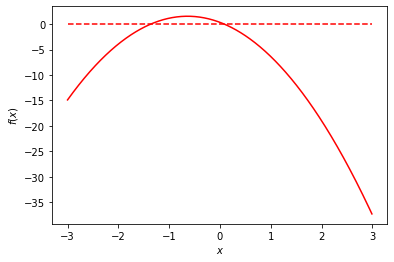

In [3]:
'''
Example 1: Plotting a complex function
'''

# Let us choose a,b,c to be random numbers between -5 and 5
a=10.0*(rn.random()-0.5)
b=10.0*(rn.random()-0.5)
c=10.0*(rn.random()-0.5)
print('Choosing parameters: a = ',a,', b = ',b,', c = ',c)

# The function
def f(z):
    return a + b*z + c*z**2

# Simple plot routine
def simple_plot(func):
    x = np.arange(-3, 3, 0.01)
    plt.plot(x, np.real(func(x)), 'r')
    plt.plot(x, np.imag(func(x)), 'r--')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$f(x)$')
    
# Making plot #1
simple_plot(f)

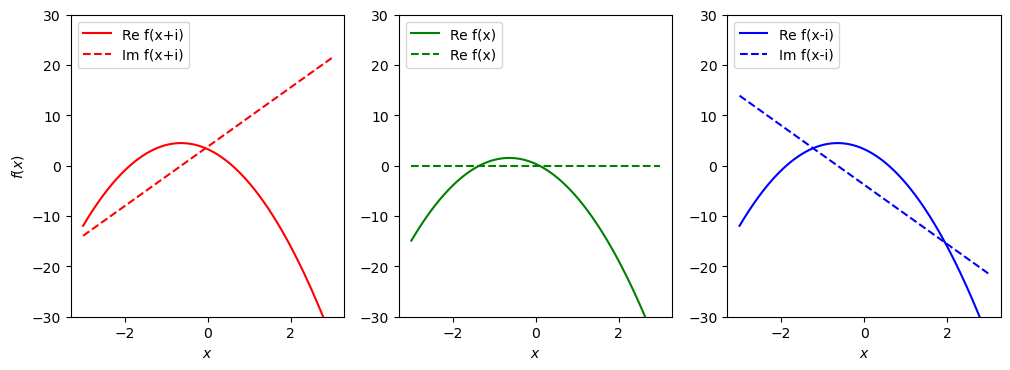

In [4]:
'''
Example 1: Plotting a complex function (continued)
'''

def simple_plot_compare(func):
    xmin = -3.0
    xmax =  3.0
    ymin = -30.0
    ymax =  30.0
    x = np.arange(xmin, xmax, 0.01)
    y = [-1,0,1]
    ax1 = plt.gcf().add_subplot(131)
    ax2 = plt.gcf().add_subplot(132)
    ax3 = plt.gcf().add_subplot(133)
    
    ax1.plot(x, np.real(func(x+1j*y[0])), 'r',label="Re f(x+i)")
    ax1.plot(x, np.imag(func(x+1j*y[0])), 'r--',label="Im f(x+i)")
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$f(x)$')
    ax1.set_ylim(ymin, ymax)
    ax1.legend(loc="upper left")

    ax2.plot(x, np.real(func(x+1j*y[1])), 'g',label="Re f(x)")
    ax2.plot(x, np.imag(func(x+1j*y[1])), 'g--',label="Re f(x)")
    ax2.set_xlabel(r'$x$')
    # ax2.set_ylabel(r'$f(x)$')
    ax2.set_ylim(ymin, ymax)
    ax2.legend(loc="upper left")

    ax3.plot(x, np.real(func(x+1j*y[2])), 'b',label="Re f(x-i)")
    ax3.plot(x, np.imag(func(x+1j*y[2])), 'b--',label="Im f(x-i)")
    ax3.set_xlabel(r'$x$')
    # ax3.set_ylabel(r'$f(x)$')
    ax3.set_ylim(ymin, ymax)
    ax3.legend(loc="upper left")

# Making plot #2
plt.figure(figsize=(12,4), dpi= 100)
simple_plot_compare(f)

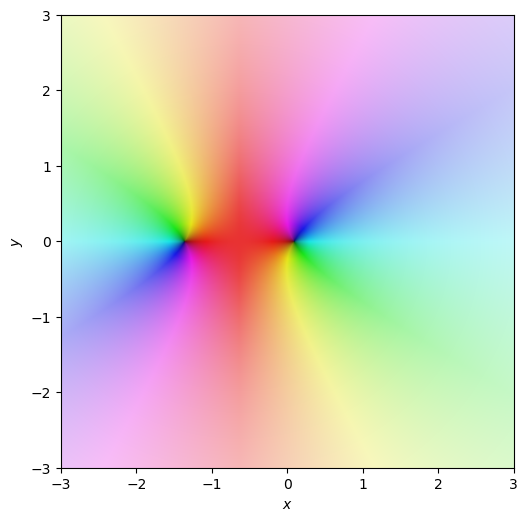

In [5]:

'''
Example 1: Plotting a complex function (continued)
'''

'''
A utility function very useful for plotting functions in the complex plane.

Taken from the forum http://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
'''
def colorize(z):
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.5)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)                      # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2)
    c = c.swapaxes(0,1)
    return c

'''
Plots a function 'f(z)' in the Argand (complex) plane (domain coloring version)

Taken from https://flothesof.github.io/branch-cuts-with-square-roots.html

These websites explain the idea of using domain coloring for complex functions
https://www.dynamicmath.xyz/domain-coloring/
https://users.mai.liu.se/hanlu09/complex/domain_coloring.html
'''
def domain_coloring_plot(func):
    xmin, xmax, xnum = -3, 3, 500
    ymin, ymax, ynum = -3, 3, 500
    zmin, zmax = -30, 30
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    plt.imshow(colorize(func(Z)), origin='lower', vmin=zmin, vmax=zmax, extent=(xmin,xmax,ymin,ymax))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

# Making plot #3
plt.figure(figsize=(8,6), dpi= 100)
domain_coloring_plot(f)


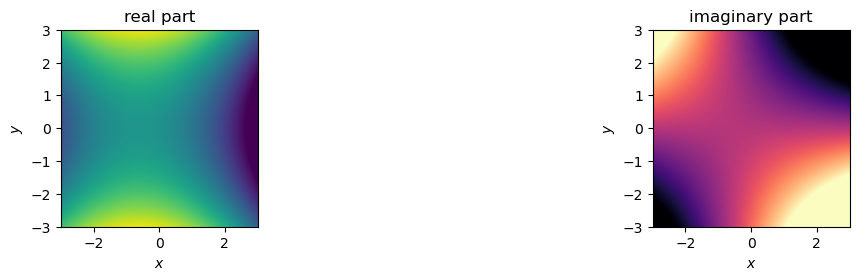

In [6]:
'''
Example 1: Plotting a complex function (continued)
'''

'''
Plots a function 'f(z)' in the Argand (complex) plane (2D colormap version)

Taken from https://flothesof.github.io/branch-cuts-with-square-roots.html
'''
def argand_plot_2D(func):
    xmin, xmax, xnum = -3, 3, 200
    ymin, ymax, ynum = -3, 3, 200
    zmin, zmax = -30, 30
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(421)
    ax2 = plt.gcf().add_subplot(422)
    ax1.imshow(np.real(func(Z)), origin='lower', extent=(xmin,xmax,ymin,ymax), vmin=zmin, vmax=zmax, cmap='viridis' )
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_title('real part')
    ax2.imshow(np.imag(func(Z)), origin='lower', extent=(xmin,xmax,ymin,ymax), vmin=zmin, vmax=zmax, cmap='magma')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_title('imaginary part')

# Making plot #4
plt.figure(figsize=(14,12), dpi= 100)
argand_plot_2D(f)

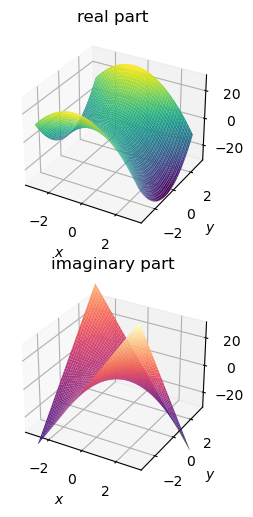

In [7]:
'''
Example 1: Plotting a complex function (continued)
'''

'''
Plots a function 'f(z)' in the Argand (complex) plane (3D surface version)

Taken from https://flothesof.github.io/branch-cuts-with-square-roots.html
'''
def argand_plot_3D(func):
    xmin, xmax, xnum = -3, 3, 50
    ymin, ymax, ynum = -3, 3, 50
    zmin, zmax = -30, 30
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_zlim(zmin,zmax)
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_zlim(zmin,zmax)
    ax2.set_title('imaginary part')

# Making plot #5
plt.figure(figsize=(8,6), dpi= 100)
argand_plot_3D(f)

## Pole singularities

Now that
Pole singularities are the simplest non-analyticity we need to understand. 

If a function $f$ exhibits a pole singularitiy, in a region around the pole the function has the general form
$$
f(z) = \frac{r_0}{z - z_0} \, ,
$$
where $z_0$ is the position of the pole in the complex $z$-plane, and $r_0$ is the residue at the pole.

<br />
<br />

### Example 2: Complex function with a pole (2)
Consider the function $g(z)$ defined by
$$
g(z) = \frac{f(z)}{z - z_0} \, ,
$$
where $z_0 \in \mathbb{C}$ is the value of the pole, and $f(z) = a + bz + cz^2$ as given in Example 1.

Choose a pole position $z_0 = 1/2 + i$.

Plot:

1. The real and imaginary parts of $g(x)$ where $x\in [-3,3]$

2. The real and imaginary parts of $g(x + i y)$ where $x\in [-3,3]$ and $y = \{-1,0,1\}$

3. $g(z)$ using 'domain_coloring_plot' in the domain $D = \{z | z = x + i y, x \in[-3,3], y \in [-3,3]\}$

4. The real and imaginary parts of $g(z)$ using 'argand_plot_2D' in the domain $D = \{z | z = x + i y, x \in[-3,3], y \in [-3,3]\}$

5. The real and imaginary parts of $g(z)$ using 'argand_plot_3D' in the domain $D = \{z | z = x + i y, x \in[-3,3], y \in [-3,3]\}$

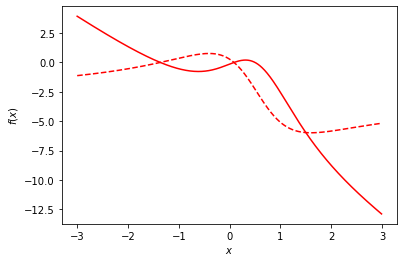

In [8]:
'''
Example 2: Complex function with a pole
'''

# Choose pole position z_0
z0 = 0.5 + 1j*1.0

# Define function g(z)
def g(z):
    return f(z) / ( z - z0 )

# Making plot #1
simple_plot(g)

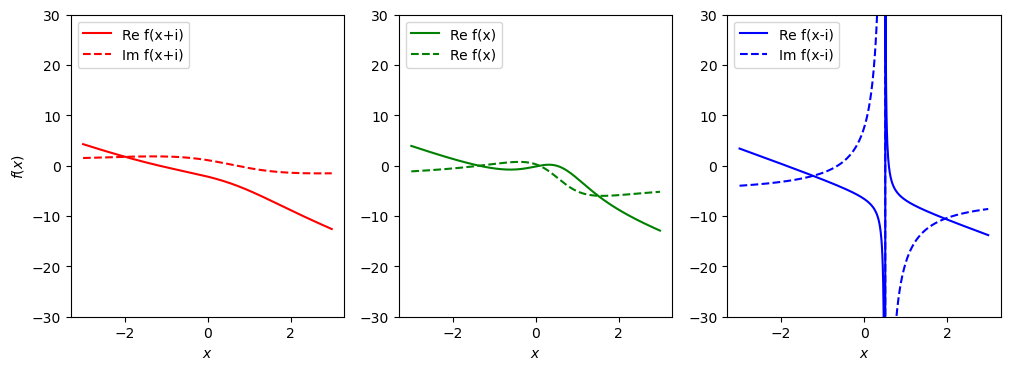

In [9]:
'''
Example 2: Complex function with a pole (continued)
'''

# Making plot #2
plt.figure(figsize=(12,4), dpi= 100)
simple_plot_compare(g)

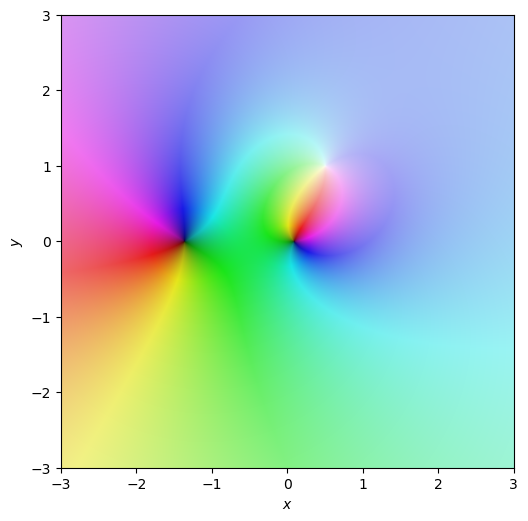

In [10]:
'''
Example 2: Complex function with a pole (continued)
'''

# Making plot #3
plt.figure(figsize=(8,6), dpi= 100)
domain_coloring_plot(g)

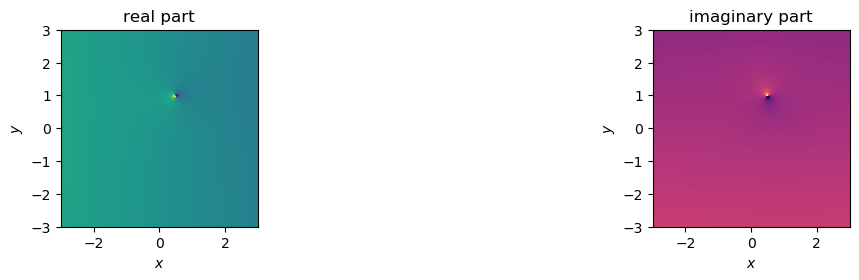

In [10]:
'''
Example 2: Complex function with a pole (continued)
'''

# Making plot #4
plt.figure(figsize=(14,12), dpi= 100)
argand_plot_2D(g)

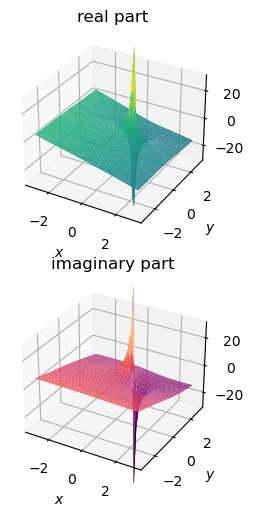

In [11]:
'''
Example 2: Complex function with a pole (continued)
'''

# Making plot #5
plt.figure(figsize=(8,6), dpi= 100)
argand_plot_3D(g)

## Cauchy's theorem

Here we numerically investigate *Cauchy's theorem* and its consequences. Cauchy's theorem states that if a function $f(z)$ with $z\in\mathbb{C}$ is analytic everywhere within and on a closed contour $C$, then
$$
\oint_{C} \!\mathrm{d}z \, f(z) = 0
$$

Cauchy's theorem can be used to prove the *Cauchy integral formula*, which states that if a function $f(z)$ with $z\in\mathbb{C}$ is analytic everywhere within and on a closed contour $C$, then 
$$
\oint_{C} \!\mathrm{d}z \, \frac{f(z)}{z - z_0} = 2\pi i f(z_0) \, ,
$$
provided that $z_0$ lies within the contour. We define the *residue* of a function as $f(z_0)$, which is the value of the function at the pole. 

### Exercises

1. Use Cauchy's theorem on the function $f(z)$ in Example 1.

2. Use Cauchy's integral formula on the function $f(z)$ in Example 1, with the pole of Example 2.

In [12]:
'''
Exercise 1
'''

'''
Integrates any complex function 'func' along a path 'path' in the complex plane that is formed from a list of points
'''
def contour_integrate(func,path):
    result=0.0
    for n in np.arange(len(path)-1):
        z0 = path[n]
        dz = path[n+1]-path[n]
        integrand_real = lambda x: np.real( func(z0+x*dz)*dz )
        integrand_imag = lambda x: np.imag( func(z0+x*dz)*dz )
        result_real = integrate.quad(integrand_real,0.0,1.0)[0] # keep value only
        result_imag = integrate.quad(integrand_imag,0.0,1.0)[0] # keep value only
        result += result_real + 1j*result_imag
    return result

'''
Here we choose a quadrilateral contour, with the corners specified by C1,C2,C3, and C4
'''
# Points on closed contour
C1 = 1.0
C2 = 2.0*1j + 1.2
C3 = -0.5 + 1j
C4 = -1j
C5 = C1 # close path

C = [C1,C2,C3,C4,C5]

integral = contour_integrate(lambda z:f(z),C)
print("Result of integrating along C: ", integral)
# Note, due to numerical precision, we expect results O(10^{-16})

Result of integrating along C:  (4.440892098500626e-16+4.440892098500626e-16j)


In [13]:
'''
Exercise 2
'''

# Cauchy integrand
def integrand(z,z0):
    return f(z) / (z - z0)

integral=contour_integrate(lambda z:integrand(z,z0),C) / (2.0*np.pi*1j)
fz0=f(z0)
print("Result of integrating along C: {0}\n\nf(z0): {1}".format(integral,fz0))

Result of integrating along C: (-1.2742723789284027-0.4255268837838612j)

f(z0): (-1.2742723789284032-0.42552688378386105j)


Text(1.2, 0.0, '$C$')

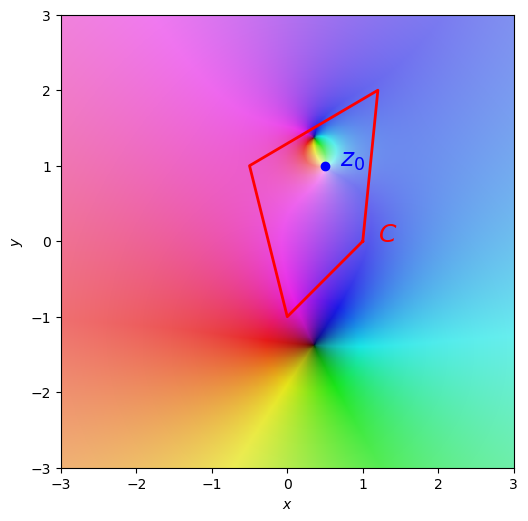

In [14]:
# We can visualize this integral by plotting the integrand in the Argand plane

plt.figure(figsize=(8,6), dpi= 100)
domain_coloring_plot(lambda z:integrand(z,z0))
plt.plot(np.real(z0),np.imag(z0),'bo')                                      # put a blue circle at the point z0
plt.text(np.real(z0)+0.2,np.imag(z0),r'$z_0$',fontsize=18,color='b')        # Label the point z0
plt.plot(np.real(C),np.imag(C),'r-',lw=2)                                   # draw contour C
plt.text(np.real(C[0])+0.2,np.imag(C[0]),r'$C$',fontsize=18,color='r')      # Label contour C

## The Square Root Function

Defining $z = r e^{i\varphi}$, the square-root gives $\sqrt{z} = \sqrt{r} e^{i\varphi /2}$, where the domain of $\varphi$ is $\varphi \in [-\pi,\pi)$, meaning there is a branch cut directed along the negative real axis starting at $z=0$.

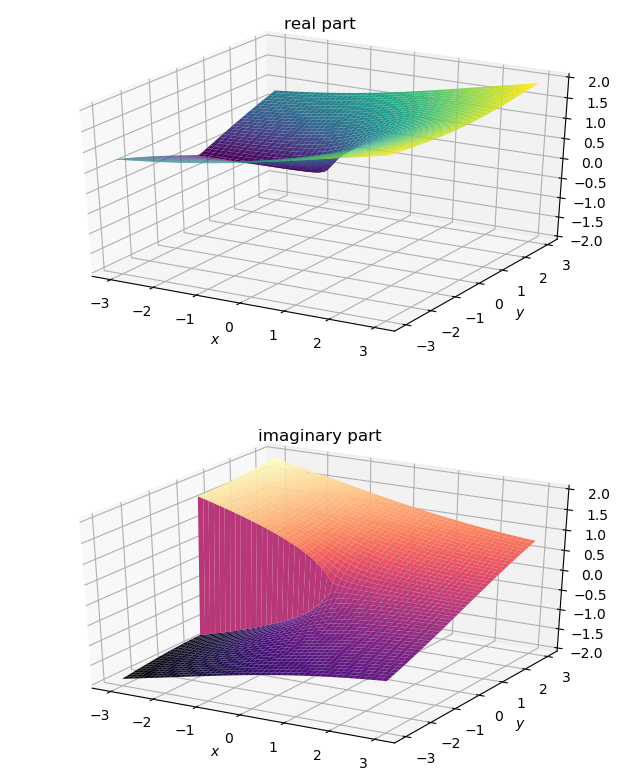

In [17]:
'''
plot routine for square root study
'''
def sqrt_argand_plot_3D(func):
    xmin, xmax, xnum = -3, 3, 50
    ymin, ymax, ynum = -3, 3, 50
    zmin, zmax = -2, 2
    X, Y = np.meshgrid( np.linspace(xmin, xmax, xnum),  # points on the x-axis (xmin,xmax,xnum)
                        np.linspace(ymin, ymax, ynum) ) # points on the y-axis (ymin,ymax,ynum)
    Z = X + 1j * Y
    ax1 = plt.gcf().add_subplot(211, projection='3d')
    ax2 = plt.gcf().add_subplot(212, projection='3d')
    ax1.plot_surface(X, Y, np.real(func(Z)), rstride=1, cstride=1, cmap='viridis')
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')
    ax1.set_zlim(zmin,zmax)
    ax1.set_title('real part')
    ax2.plot_surface(X, Y, np.imag(func(Z)), rstride=1, cstride=1, cmap='magma')
    ax2.set_xlabel(r'$x$')
    ax2.set_ylabel(r'$y$')
    ax2.set_zlim(zmin,zmax)
    ax2.set_title('imaginary part')

# Make plot
plt.figure(figsize=(8,10), dpi= 100, facecolor='w', edgecolor='k')
sqrt_argand_plot_3D(np.sqrt)

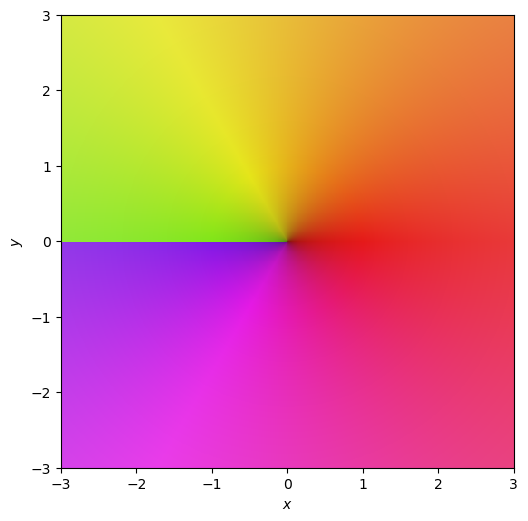

In [19]:
# Let's look at the domain coloring plot
plt.figure(figsize=(8,6), dpi= 100)
domain_coloring_plot(np.sqrt)

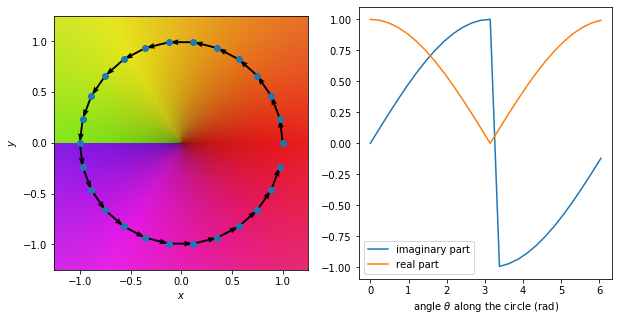

In [21]:
'''
As seen above, the standard square root function has a branch cut along the negative reals. Sometimes, this can be problematic. In particular, if you were to follow the unit circle in a given direction, you would encounter a discontinuity
'''

theta = np.linspace(0, 2 * np.pi, num=26, endpoint=False)
unit_circle = [np.exp(1j * _) for _ in theta]

def plot_along_curve(func=np.sqrt, param=theta, curve=unit_circle):
    "Plots curve and real/imag values of function func along given curve."
    plt.subplot(121)
    plt.plot(np.real(curve), np.imag(curve), 'o')
    x = np.real(curve)
    y = np.imag(curve)
    plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)
    plt.xlim(-1.25, 1.25)
    plt.ylim(-1.25, 1.25)
    domain_coloring_plot(func)
    plt.subplot(122)
    plt.plot(param, np.imag(func(curve)), label='imaginary part')
    plt.plot(param, np.real(func(curve)), label='real part')
    plt.legend(loc='lower left')
    plt.xlabel('angle $\\theta$ along the circle (rad)')

plt.figure(figsize=(10, 5))
plot_along_curve()

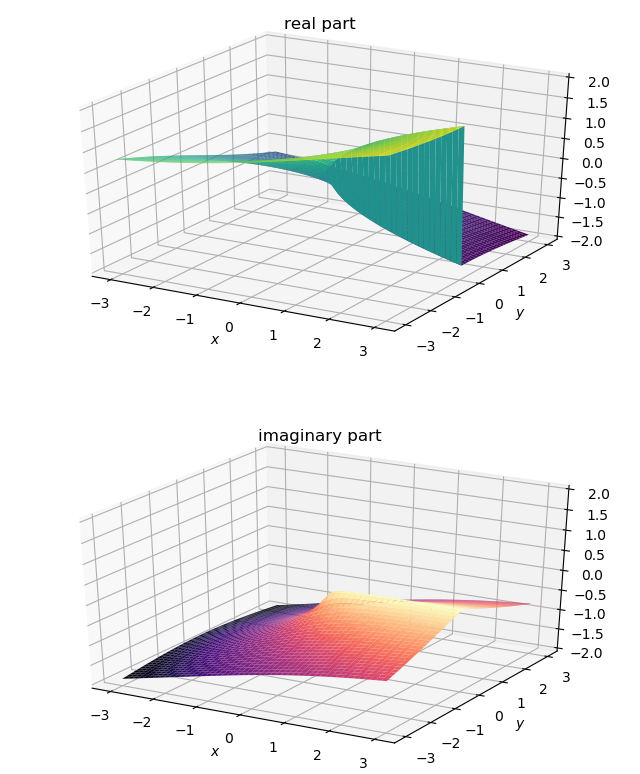

In [23]:
'''
Can change orientation of branch point 
'''

def square_root(z, theta):
    "Square root with different branch cut defined by alpha parameter."
    argument = np.angle(z) # between -pi and +pi
    modulus = np.abs(z)
    argument = np.mod(argument + theta, 2 * np.pi) - theta
    return np.sqrt(modulus) * np.exp(1j * argument / 2)

# Make plot
plt.figure(figsize=(8,10), dpi= 100, facecolor='w', edgecolor='k')
sqrt_argand_plot_3D(lambda z:square_root(z, 2 *np.pi))
    

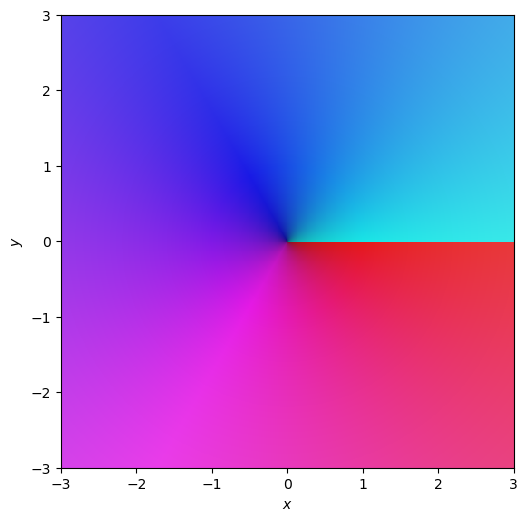

In [24]:
# Let's look at the domain coloring plot
plt.figure(figsize=(8,6), dpi= 100)
domain_coloring_plot(lambda z:square_root(z, 2 *np.pi))